# Лабораторная 4 Югай Ильи AIN-1-21

In [38]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

breast_cancer = load_breast_cancer()


### Изучение данных

In [39]:
# Посмотрим на данные и их описание
print(breast_cancer.DESCR)

# Создадим DataFrame для анализа
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

# Посмотрим на первые несколько строк данных
data.head()


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Разделение данных на обучающий и тестовые наборы


In [40]:
from sklearn.model_selection import train_test_split

X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Для визуализации данных в данном случае мы можем построить гистограммы признаков:

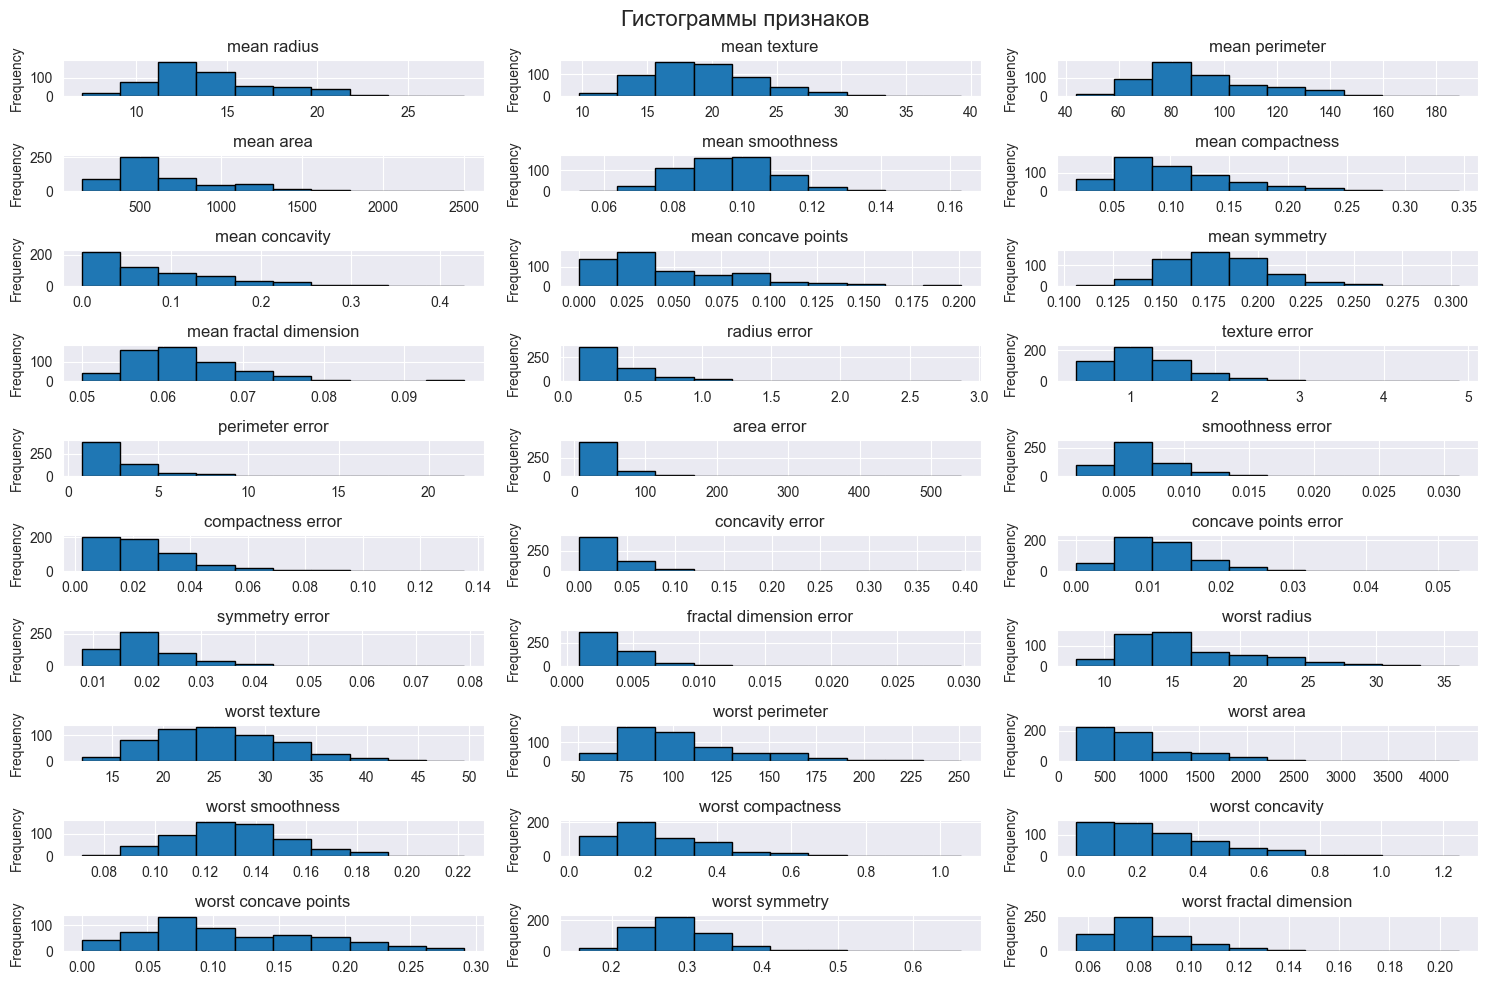

In [41]:
# Визуализация гистограмм признаков для Breast Cancer Wisconsin
num_features = len(breast_cancer.feature_names)
num_cols = 3  # Количество столбцов (графиков в одной строке)
num_rows = (num_features + num_cols - 1) // num_cols  # Количество строк

plt.figure(figsize=(15, 10))
plt.suptitle("Гистограммы признаков", fontsize=16)

for i, feature in enumerate(breast_cancer.feature_names, start=1):
    plt.subplot(num_rows, num_cols, i)
    data[feature].plot(kind='hist', title=feature, edgecolor='k')

plt.tight_layout()
plt.show()


### Построение модели k-ближайших соседей
Для построения модели k-ближайших соседей используем библиотеку 'KNeighborsClassifier':

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# Создание модели
knn = KNeighborsClassifier(n_neighbors=10)

# Обучение модели на обучающих данных
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

### Прогноз модели
Теперь мы можем сделать прогнозы на тестовых данных:

In [43]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

### Оценка качества модели
Давайте оценим качество модели, вычислив метрики классификации, такие как точность, полнота и F1-мера.

In [44]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)


Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### График распределения классов
Давайте посмотрим на распределение классов в датасете "wine":

C:\Users\for_i\AppData\Local\Temp\ipykernel_11472\3814985909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y, palette="Set1")


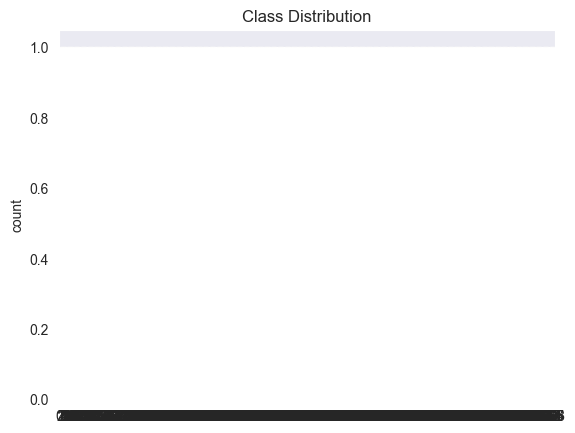

In [45]:
import seaborn as sns

sns.countplot(y, palette="Set1")
plt.title("Class Distribution")
plt.show()


### Матрица ошибок
После получения прогнозов модели, можно построить матрицу ошибок для оценки производительности модели:

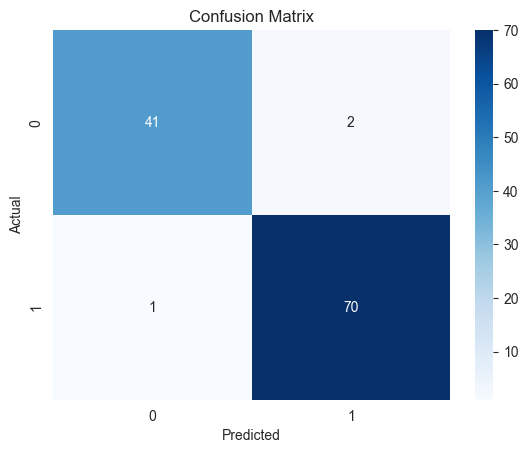

In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Кривая обучения
Можно также построить кривую обучения, чтобы оценить, как изменение количества соседей влияет на качество модели:

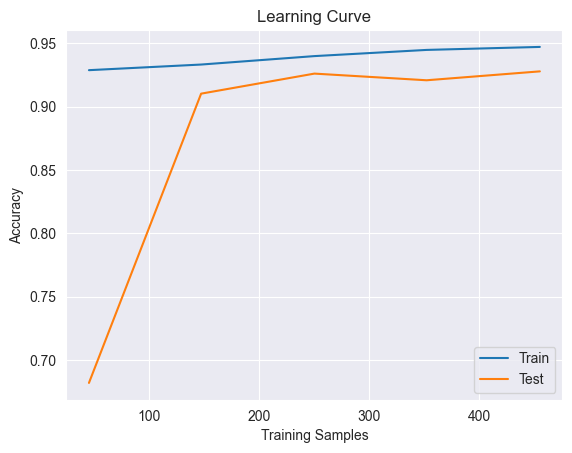

In [47]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=5), X, y, cv=5)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Test")
plt.title("Learning Curve")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


## Вывод
Модель k-ближайших соседей отлично справляется с задачей диагностики рака груди. Она демонстрирует высокую точность и низкое количество ошибок. Модель может быть полезной в медицинской диагностике.